In [396]:
# Import required packages
import pytesseract
import cv2
import numpy as np
import utils
import matplotlib.pyplot as plt

In [431]:
# Show the figures / plots inside the notebook
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        plt.axis('off')
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 90, 255, cv2.THRESH_BINARY)[1]
    #return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((7,7),np.uint8)
    return cv2.dilate(image, kernel, iterations = 2)
    
#erosion
def erode(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((2,2))
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)


In [432]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

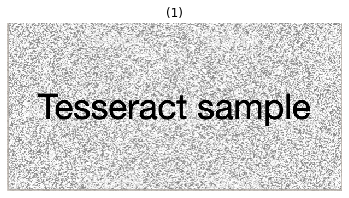

Text Version:
 Tesseract sample



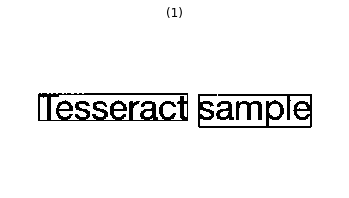

In [441]:
img = cv2.imread("example_04.png")
show_images([img])

################################### Pre Processing #################################
img = get_grayscale(img)
img = thresholding(img)
img = opening(img)
####################################################################################

print("Text Version:\n",pytesseract.image_to_string(img))
Height, Width = img.shape


'''
################################### Detecting Characters #################################
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
    cv2.rectangle(img,(x,Height-y),(w,Height-h),(0,0,255),2)
    cv2.putText(img,b[0],(x,Height-y+25),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)

'''
################################### Detecting Words #################################
boxes = pytesseract.image_to_data(img)
for x,b in enumerate(boxes.splitlines()):
    if x==0:
        continue
    b = b.split()
    if len(b) == 12:
        x,y,w,h,word = int(b[6]),int(b[7]),int(b[8]),int(b[9]),b[-1]
        cv2.rectangle(img,(x,y),(w+x,h+y),(0,255,0),2)
        cv2.putText(img,word,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),1)
#####################################################################################
show_images([img])